In [1]:
!pwd

/home/hamim-mahmud/Projects/tf_organizer/notebooks


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go
from PIL import Image


In [3]:

filepath = '/home/hamim-mahmud/Projects/tf_organizer/merged_block_img.npy'
images = np.load(filepath)
images = images > 255//2
images = np.vectorize(clear_border,signature='(m,n)->(m,n)')(images)

In [4]:
images.shape

(20, 714, 706)

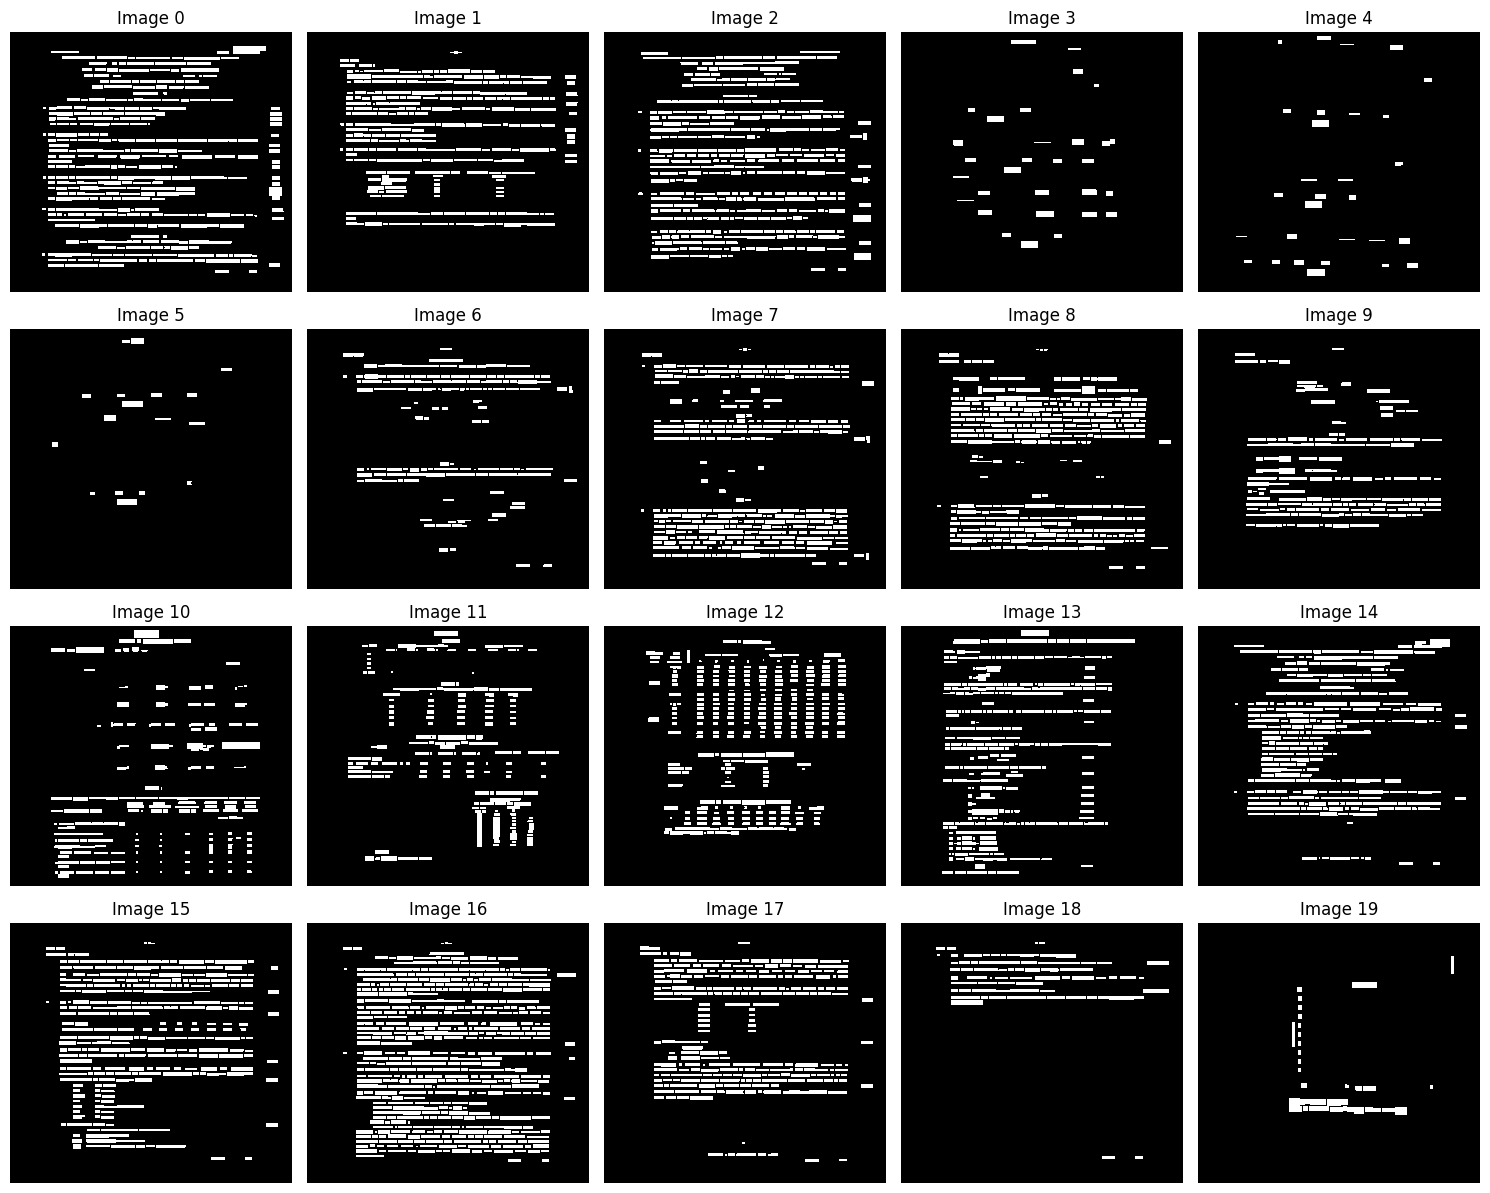

In [5]:
n_images = len(images)
rows = int(np.ceil(np.sqrt(n_images)))
cols = rows

plt.figure(figsize=(15, 15))
for i in range(n_images):
    plt.subplot(rows, cols, i + 1)
    plt.pcolormesh(images[i], cmap='Greys_r')
    plt.axis('off')
    plt.title(f'Image {i}')
plt.tight_layout()

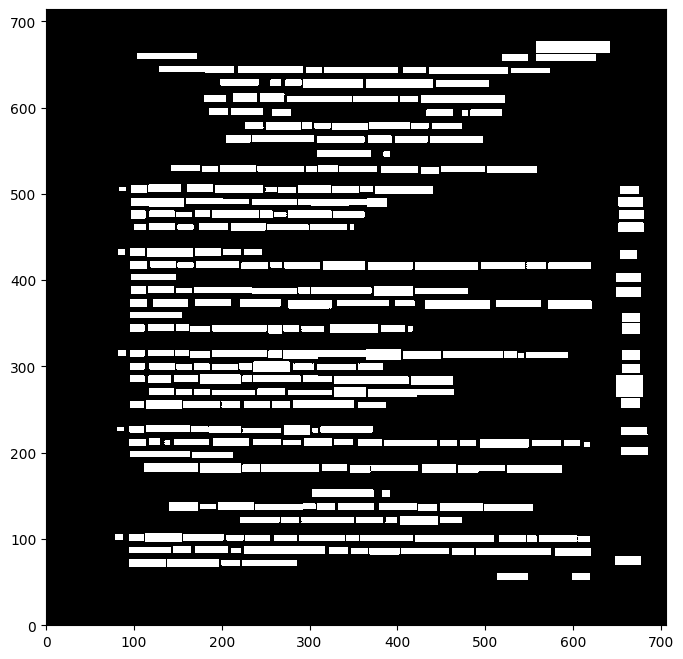

In [6]:
plt.figure(figsize=(8,8))
plt.pcolormesh(images[0], cmap='Greys_r')

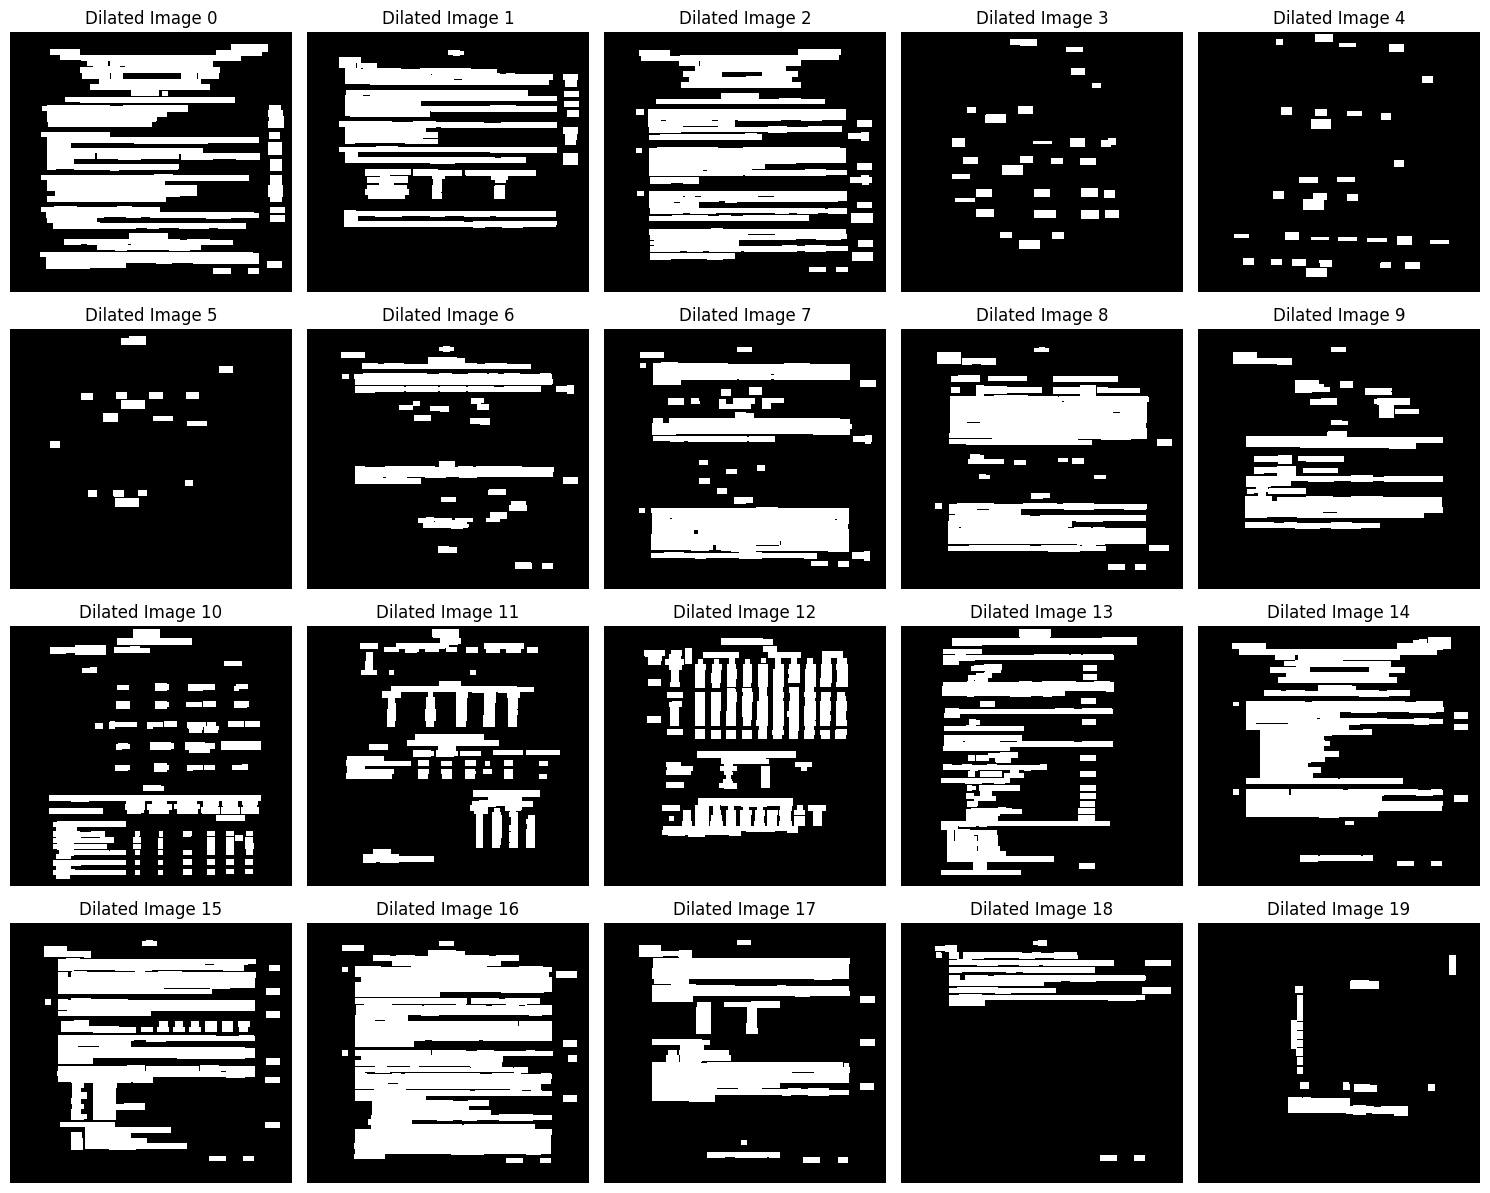

In [7]:
dilated_images = np.array([binary_dilation(image, structure=np.ones((9, 9))).astype(np.uint8) for image in images])

plt.figure(figsize=(15, 15))
for idx, img in enumerate(dilated_images):
    plt.subplot(rows, cols, idx + 1)
    plt.pcolormesh(img, cmap='Greys_r')
    plt.axis('off')
    plt.title(f'Dilated Image {idx}')
plt.tight_layout()

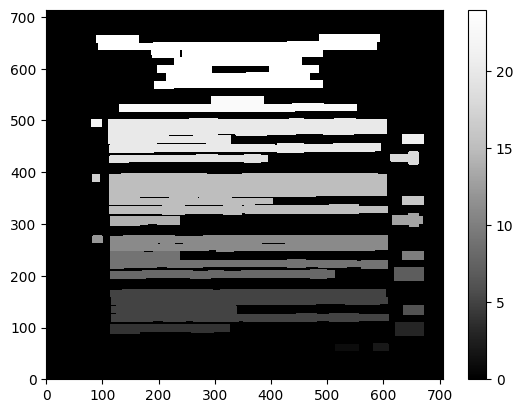

In [8]:
images_labeled = np.vectorize(label, signature='(m,n)->(m,n)')(dilated_images)

target = images_labeled[2]

plt.pcolormesh(target, cmap='Greys_r')
plt.colorbar()

<BarContainer object of 24 artists>

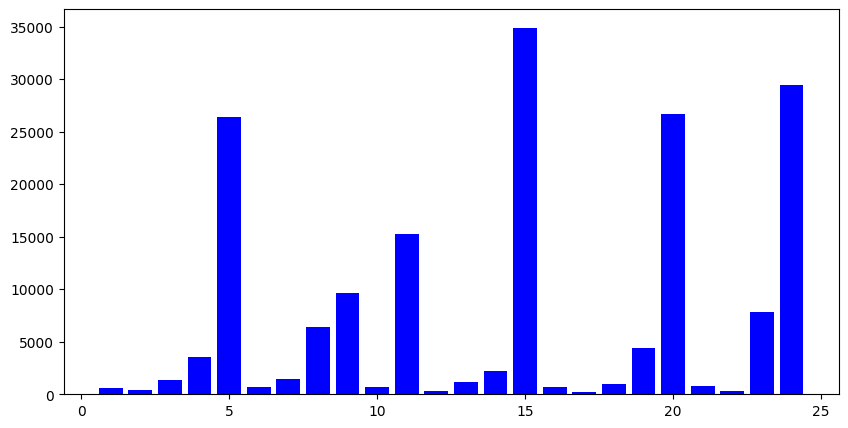

In [9]:
values, counts = np.unique(target, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(values[1:], counts[1:], color='blue')

In [10]:



max_count = np.sum(counts[1:])
percentage_count = counts[1:] / max_count * 100

idxs = np.where(np.array(percentage_count) > 15)[0]
print("Number of objects with more than 2% of the largest object:", len(idxs))

top_values = values[1:][idxs]
print("Top values:", top_values)

Number of objects with more than 2% of the largest object: 3
Top values: [15 20 24]


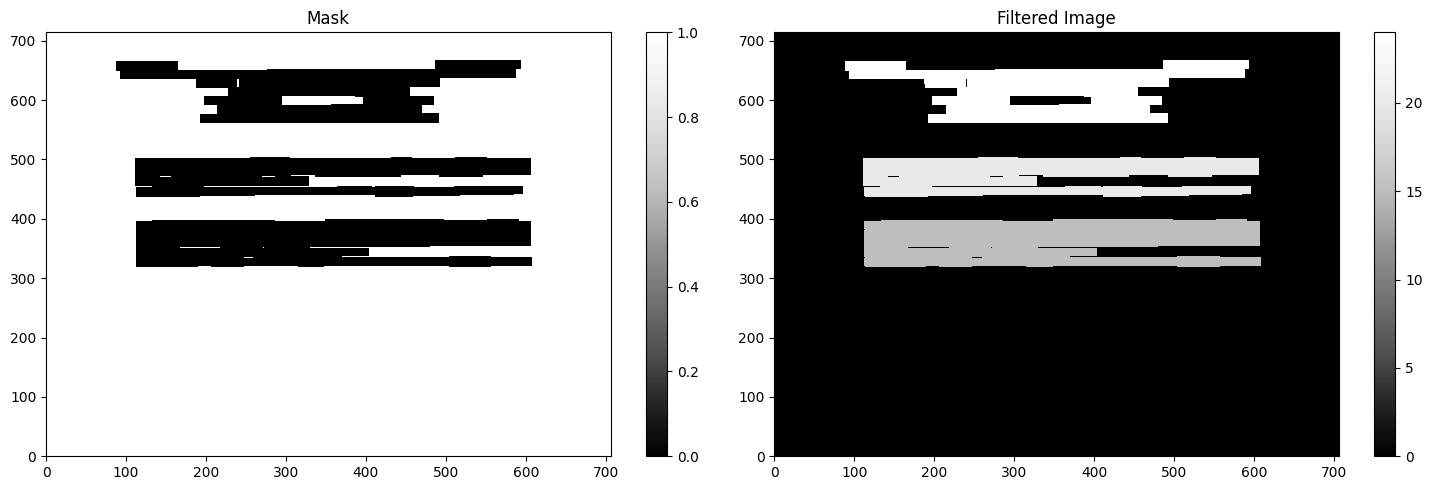

In [11]:
# Create a mask for the objects to be removed
mask = np.isin(target, top_values)
mask = ~mask
# Apply the mask
target[mask] = 0

# Visualize the result
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(mask, cmap='Greys_r')
plt.title('Mask')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(target, cmap='Greys_r')
plt.title('Filtered Image')
plt.colorbar()
plt.tight_layout()



In [12]:
masked__image = target

props = regionprops(masked__image)

In [13]:
# Access moments up to 3rd order
for prop in props:
    print(f"Label: {prop.label}")
    print(f"Centroid: {prop.centroid}")
    print(f"Area: {prop.area}")
    print(f"Bounding Box: {prop.bbox}")
    print(f"Orientation: {prop.orientation}")
    print(f"Eccentricity: {prop.eccentricity}")
    print(f"Major Axis Length: {prop.major_axis_length}")
    print(f"Minor Axis Length: {prop.minor_axis_length}")
    print("-" * 30)

    print("Moment m00 (area):", prop.moments[0, 0])  # Same as props.area
    print("Moment m10:", prop.moments[1, 0])
    print("Moment m01:", prop.moments[0, 1])
    print("Moment m11:", prop.moments[1, 1])
    print("Central moment μ20:", prop.moments_central[2, 0])
    print("Central moment μ02:", prop.moments_central[0, 2])
    print("Central moment μ11:", prop.moments_central[1, 1])
        # These are scale-invariant
    print("Normalized moment η20:", prop.moments_normalized[2, 0])
    print("Normalized moment η02:", prop.moments_normalized[0, 2])
    print("Normalized moment η11:", prop.moments_normalized[1,1])
    print("Normalized moment η22:", prop.moments_normalized[2, 2])
    print("Hu moments (7 invariant moments):", prop.moments_hu)
    print("-" * 30)
    print("-" * 30)

Label: 15
Centroid: (359.97080563832225, 344.9454217281687)
Area: 34904.0
Bounding Box: (318, 112, 399, 608)
Orientation: 1.5569163812714326
Eccentricity: 0.9861977102694747
Major Axis Length: 562.8847243781504
Minor Axis Length: 93.1979310146363
------------------------------
Moment m00 (area): 34904.0
Moment m10: 1464949.0
Moment m01: 8130727.0
Moment m11: 350582571.0
Central moment μ20: 19077691.25094548
Central moment μ02: 691055243.0283922
Central moment μ11: 9329408.384741053
Normalized moment η20: 0.015659410754355292
Normalized moment η02: 0.5672341460078985
Normalized moment η11: 0.00765779444011844
Normalized moment η22: 0.009004744039050036
Hu moments (7 invariant moments): [ 5.82893557e-01  3.04469256e-01  3.15848107e-03  3.38168797e-03
  1.10479555e-05  1.86528717e-03 -2.97613091e-07]
------------------------------
------------------------------
Label: 20
Centroid: (472.2027665317139, 337.43585994901787)
Area: 26676.0
Bounding Box: (437, 111, 504, 606)
Orientation: 1.55867

In [14]:
# Access moments up to 3rd order
for prop in props:
    print(f"Label: {prop.label}")
    print(f"Centroid: {prop.centroid}")
    print("Moment m00 (area):", prop.moments[0, 0])  # Same as props.area
    print("Moment m11:", prop.moments[1, 1])
    print("Central moment μ11:", prop.moments_central[1, 1])
    print("Central moment μ02:", prop.moments_central[0, 2])
    print("Central moment μ20:", prop.moments_central[2,0])
        # These are scale-invariant
    print("Normalized moment η11:", prop.moments_normalized[1,1])
    print("-" * 30)

Label: 15
Centroid: (359.97080563832225, 344.9454217281687)
Moment m00 (area): 34904.0
Moment m11: 350582571.0
Central moment μ11: 9329408.384741053
Central moment μ02: 691055243.0283922
Central moment μ20: 19077691.25094548
Normalized moment η11: 0.00765779444011844
------------------------------
Label: 20
Centroid: (472.2027665317139, 337.43585994901787)
Moment m00 (area): 26676.0
Moment m11: 219022759.0
Central moment μ11: 6383862.433535761
Central moment μ02: 537112875.2563727
Central moment μ20: 10356840.23582994
Normalized moment η11: 0.008971025730197873
------------------------------
Label: 24
Centroid: (615.4771106432113, 343.92827548733277)
Moment m00 (area): 29446.0
Moment m11: 415562609.0
Central moment μ11: 5019616.657678464
Central moment μ02: 402262734.51782906
Central moment μ20: 26729884.072573487
Normalized moment η11: 0.005789191774073484
------------------------------


Top values: [18]
Bounding Box: (539, 99, 681, 646)


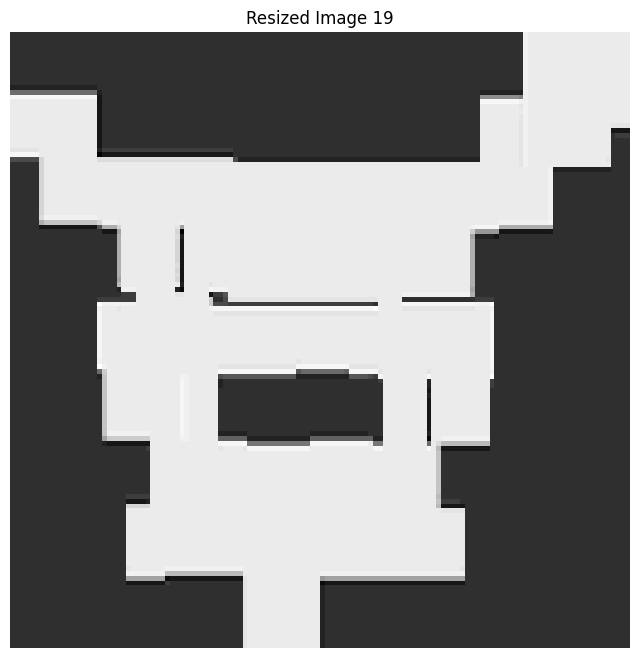

Top values: [15]
Bounding Box: (568, 79, 646, 616)


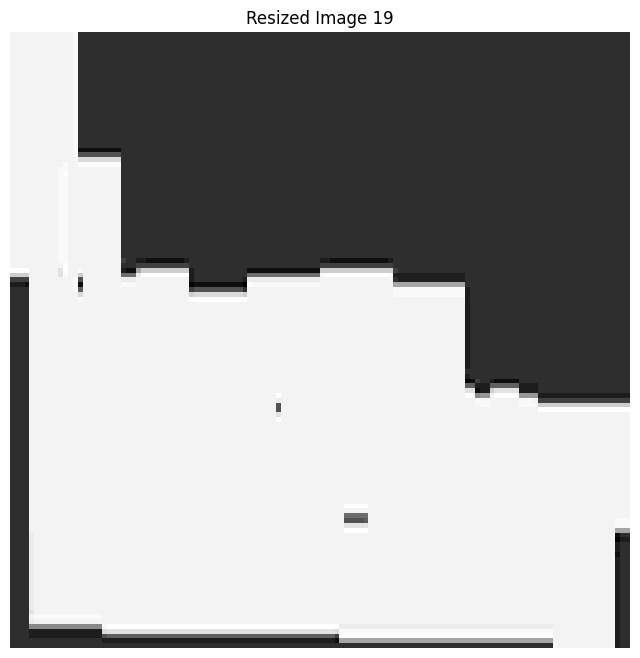

Top values: [24]
Bounding Box: (561, 88, 667, 594)


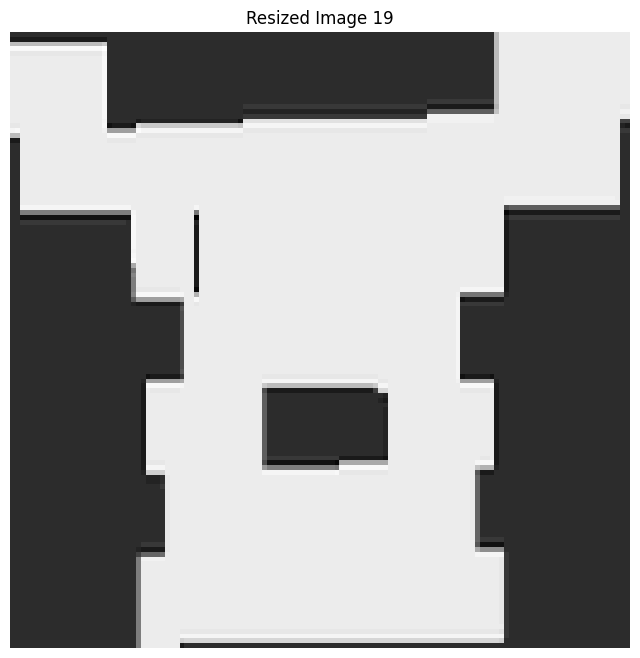

No objects found with more than 15% of the largest object.
No objects found with more than 15% of the largest object.
No objects found with more than 15% of the largest object.
Top values: [ 9 18]
Bounding Box: (561, 118, 594, 615)


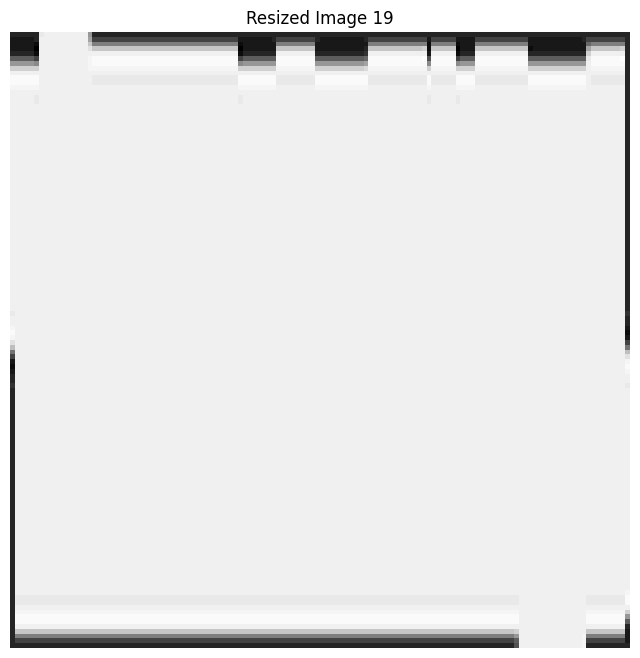

Top values: [ 5 15 23]
Bounding Box: (560, 122, 623, 617)


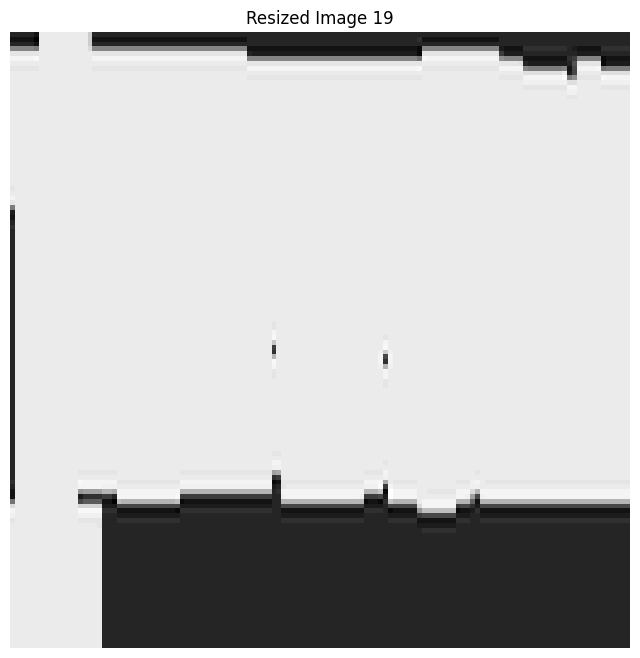

Top values: [ 5 15]
Bounding Box: (396, 120, 562, 620)


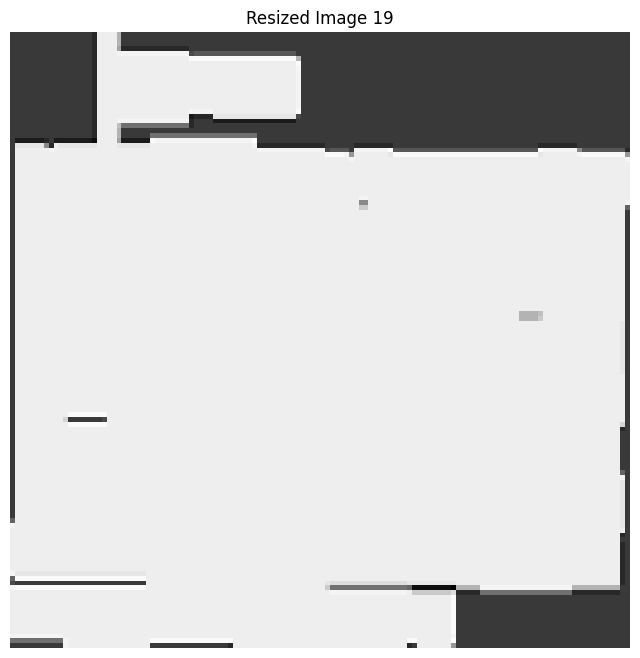

Top values: [2 7]
Bounding Box: (386, 119, 434, 614)


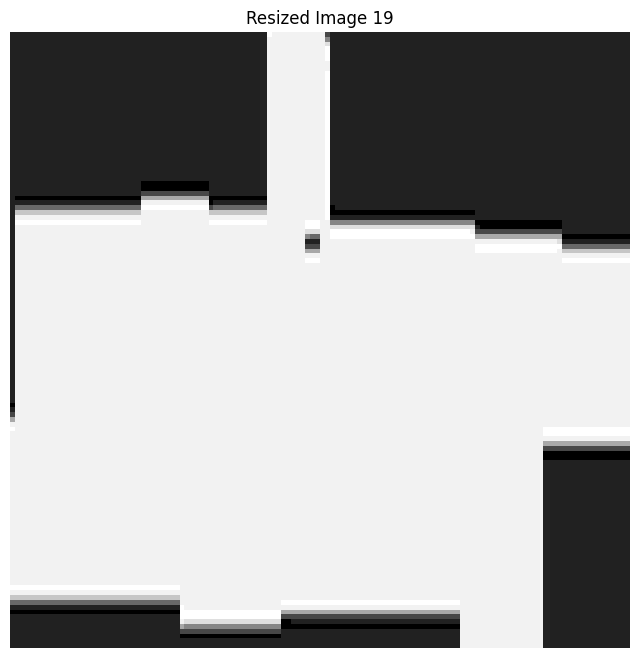

Top values: [36]
Bounding Box: (197, 98, 250, 629)


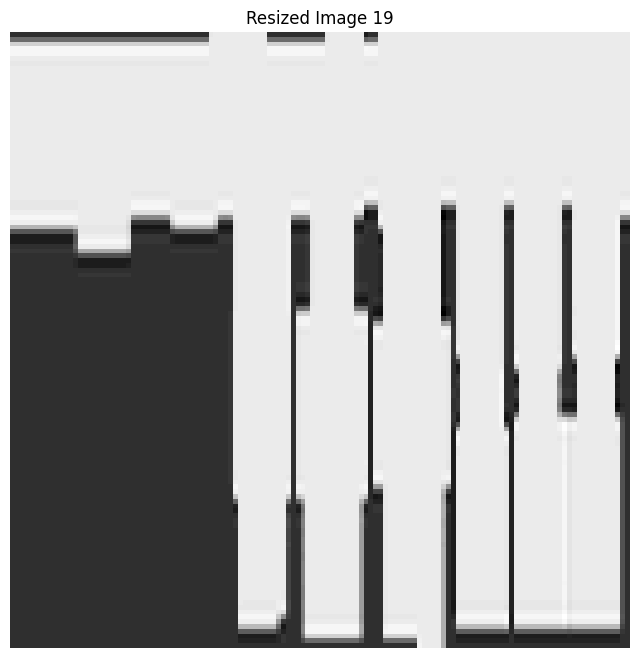

Top values: [ 2 25]
Bounding Box: (437, 187, 565, 568)


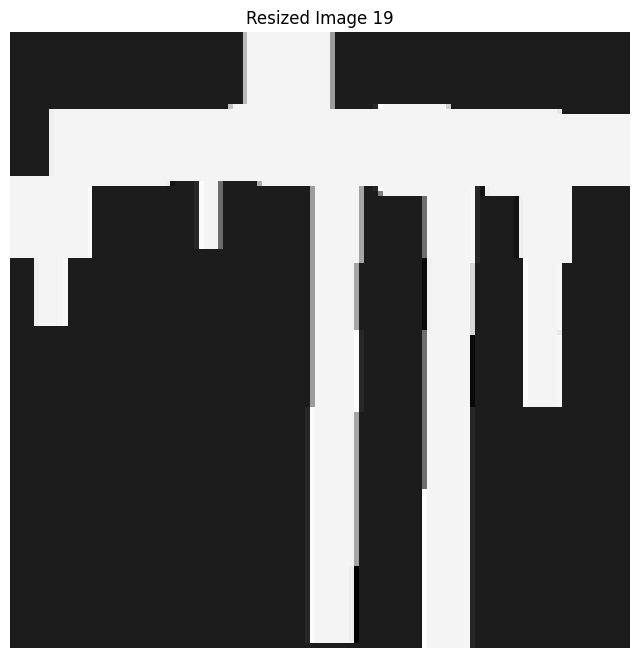

Top values: [1]
Bounding Box: (135, 146, 241, 503)


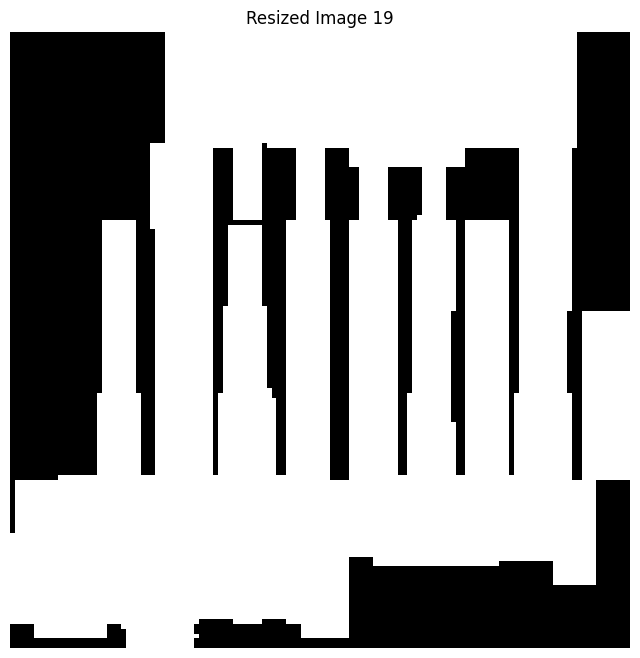

Top values: [ 1 24]
Bounding Box: (521, 102, 610, 533)


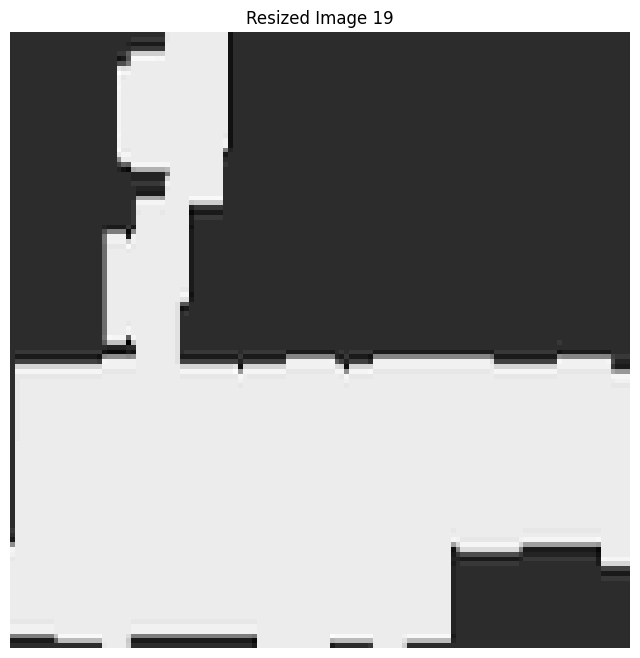

Top values: [ 5  8 13]
Bounding Box: (557, 86, 684, 634)


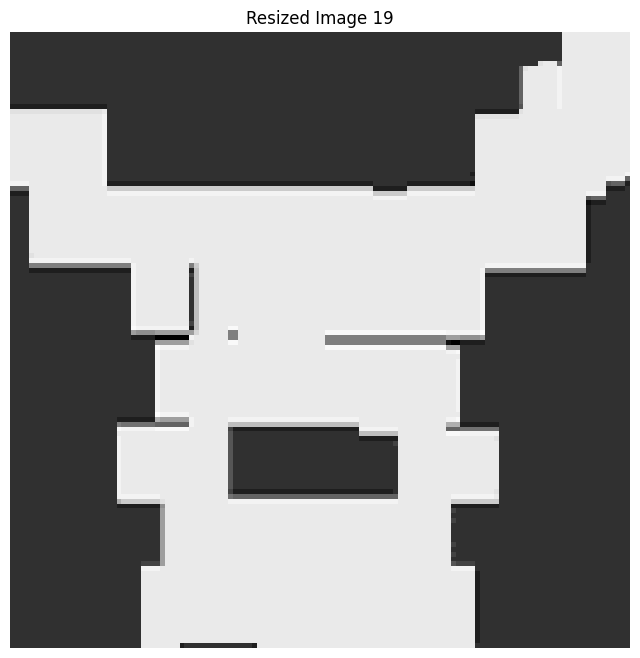

Top values: [ 7 27]
Bounding Box: (519, 120, 582, 616)


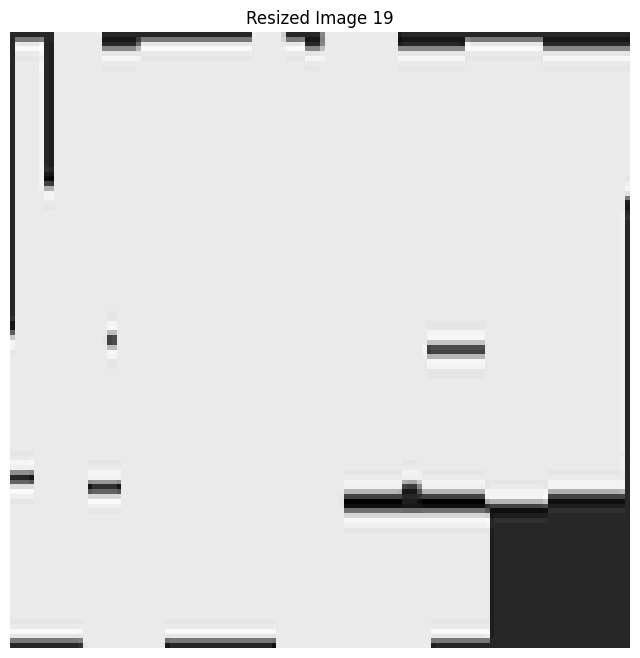

Top values: [3 8 9]
Bounding Box: (511, 120, 596, 614)


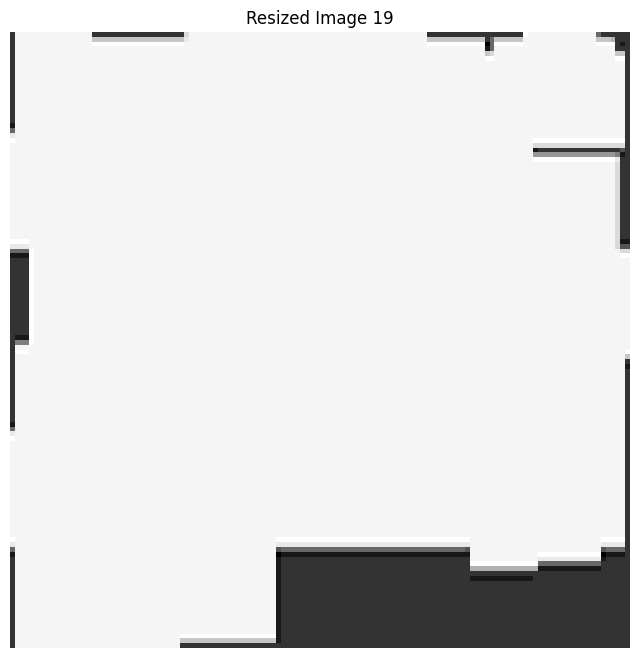

Top values: [ 5 12]
Bounding Box: (498, 120, 620, 617)


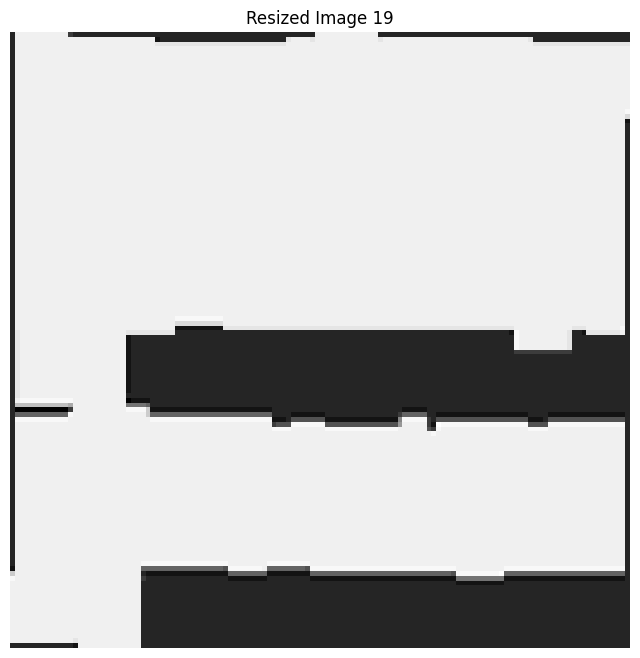

Top values: [3 6]
Bounding Box: (541, 120, 573, 613)


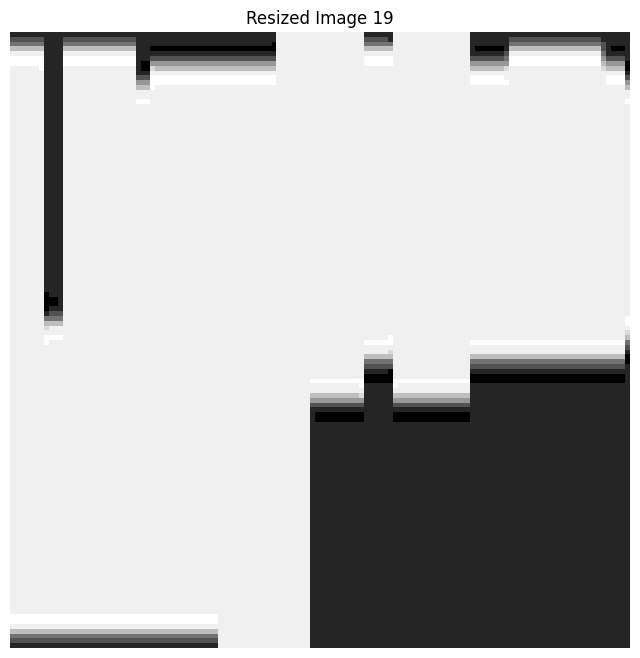

Top values: [1]
Bounding Box: (184, 225, 237, 526)


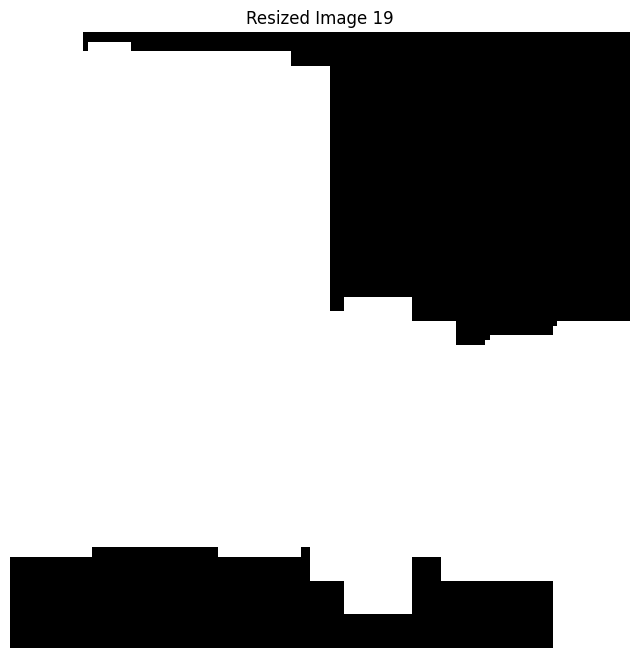

In [16]:
import time


target_shape = (128,128)

for labeled_image in images_labeled:
    values, counts = np.unique(labeled_image, return_counts=True)
    max_count = np.sum(counts[1:])
    percentage_count = counts[1:] / max_count * 100
    idxs = np.where(np.array(percentage_count) > 15)[0]
    if not idxs.size:
        print("No objects found with more than 15% of the largest object.")
        continue
    top_values = values[1:][idxs]
    print("Top values:", top_values)
    # Create a mask for the objects to be removed
    # we know that the largest object is the one we want to keep
    # So we can just remove all other objects
    highest_value = np.max(top_values)
    mask = np.isin(labeled_image, [highest_value])
    mask = ~mask
    # Apply the mask
    labeled_image[mask] = 0
    props = regionprops(labeled_image)[0]
    bounding_box = props.bbox
    print("Bounding Box:", bounding_box)
    cropped_image = labeled_image[bounding_box[0]:bounding_box[2], bounding_box[1]:bounding_box[3]]
    # Resize the image to the target shape
    resized_image = zoom(cropped_image, (target_shape[0] / cropped_image.shape[0], target_shape[1] / cropped_image.shape[1]), order=3)
    # shoew the image
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(resized_image, cmap='Greys_r')
    plt.axis('off')
    plt.title(f'Resized Image {idx}')
    plt.show()
    time.sleep(2)
    plt.close()


    